In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np

df = pd.read_csv("Rdata_embadding.csv")
custom_stop_words = ['너무', '좋아요', '맛있어요', '정말', '좋고', '맛있고', '진짜', 'ㅎㅎ']


vectorizer = TfidfVectorizer(max_features=1000, stop_words=custom_stop_words)
tfidf_matrix = vectorizer.fit_transform(df['review'])
feature_names = vectorizer.get_feature_names_out()

for cluster in df['클러스터'].unique():
    if cluster == -1:
        continue
    cluster_indices = df[df['클러스터'] == cluster].index  # 클러스터에 속한 데이터 인덱스
    cluster_tfidf = tfidf_matrix[cluster_indices].mean(axis=0)  # 클러스터 내 TF-IDF 평균 계산
    top_indices = np.argsort(cluster_tfidf.A.flatten())[::-1][:10]  # 상위 10개 단어 인덱스
    top_keywords = [(feature_names[i], cluster_tfidf[0, i]) for i in top_indices]
    print(f"Cluster {cluster} 주요 키워드: {top_keywords}")

Spectral Clustering 완료! 결과가 'Rdata_Spectral_Cleaned.csv'에 저장되었습니다.


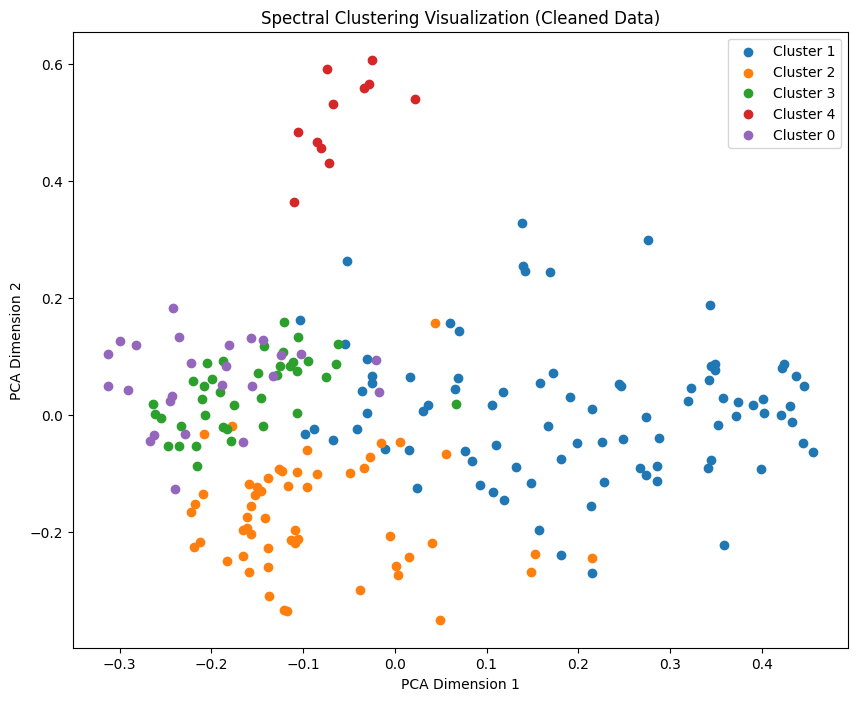

In [ ]:
import pandas as pd
from sklearn.cluster import SpectralClustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

df = pd.read_csv("Rdata_embadding.csv")

custom_stop_words = ['너무', '좋아요', '맛있어요', '정말', '좋고', '맛있고', '진짜', 'ㅎㅎ']

vectorizer = TfidfVectorizer(max_features=1000, stop_words=custom_stop_words)
tfidf_matrix = vectorizer.fit_transform(df['review'])

similarity_matrix = cosine_similarity(tfidf_matrix)

n_clusters = 5
spectral_clustering = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', random_state=42)
df['클러스터'] = spectral_clustering.fit_predict(similarity_matrix)

output_file = "Rdata_Spectral_Cleaned.csv"
df.to_csv(output_file, index=False, encoding='utf-8-sig')

print(f"Spectral Clustering 완료! 결과가 '{output_file}'에 저장되었습니다.")

pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(tfidf_matrix.toarray())

plt.figure(figsize=(10, 8))
unique_clusters = df['클러스터'].unique()
for cluster in unique_clusters:
    cluster_points = reduced_embeddings[df['클러스터'] == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster}")

plt.title("Spectral Clustering Visualization (Cleaned Data)")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.legend()
plt.show()

In [2]:
df =pd.read_csv("Rdata_Spectral.csv")

df = df.drop(df.columns[2], axis=1)

output_file = "Rdata_Spectral.csv"
df.to_csv(output_file, index=False, encoding='utf-8-sig')

print(f"3열(임베딩벡터)이 제거된 데이터가 저장되었습니다: {output_file}")

3열(임베딩벡터)이 제거된 데이터가 저장되었습니다: Rdata_Spectral.csv


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np

# 데이터 로드
df = pd.read_csv("Rdata_Spectral.csv")

# TF-IDF 벡터화
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')  # 최대 1000개의 단어, 불용어 제거
tfidf_matrix = vectorizer.fit_transform(df['review'])  # 리뷰 텍스트를 TF-IDF로 변환
feature_names = vectorizer.get_feature_names_out()  # 단어 목록

# 클러스터별 주요 키워드 추출
for cluster in df['클러스터'].unique():
    if cluster == -1:  # 노이즈 클러스터 제외
        continue
    cluster_indices = df[df['클러스터'] == cluster].index  # 클러스터에 속한 데이터 인덱스
    cluster_tfidf = tfidf_matrix[cluster_indices].mean(axis=0)  # 클러스터 내 TF-IDF 평균 계산
    top_indices = np.argsort(cluster_tfidf.A.flatten())[::-1][:10]  # 상위 10개 단어 인덱스
    top_keywords = [(feature_names[i], cluster_tfidf[0, i]) for i in top_indices]
    print(f"Cluster {cluster} 주요 키워드: {top_keywords}")

Cluster 1 주요 키워드: [('너무', np.float64(0.25862148023350723)), ('맛있어요', np.float64(0.14399463878511237)), ('좋아요', np.float64(0.12467487629059157)), ('카페', np.float64(0.1130962292716602)), ('커피', np.float64(0.09974045866261444)), ('좋고', np.float64(0.09189643533296514)), ('분위기도', np.float64(0.08455099313128589)), ('맛있고', np.float64(0.08112720631227713)), ('분위기', np.float64(0.07473129528635145)), ('커피도', np.float64(0.07329758701224581))]
Cluster 2 주요 키워드: [('좋아요', np.float64(0.373604593367737)), ('맛있어요', np.float64(0.21503157047383828)), ('넓고', np.float64(0.0959795522577918)), ('커피', np.float64(0.09286321608025427)), ('가성비', np.float64(0.07342266855662063)), ('커피가', np.float64(0.0732933749179877)), ('너무', np.float64(0.06622338522824438)), ('친절해요', np.float64(0.06478837553664678)), ('매장이', np.float64(0.0584050865850017)), ('스타벅스', np.float64(0.05772543975903009))]
Cluster 3 주요 키워드: [('맛있어요', np.float64(0.25418823447704847)), ('너무', np.float64(0.15744927156563066)), ('좋아요', np.float64(0.116590

Spectral Clustering 완료! 결과가 'Rdata_Spectral_filtered.csv'에 저장되었습니다.

클러스터별 주요 키워드:
Cluster 2: [('카페', np.float64(0.1281919675527884)), ('커피', np.float64(0.10273324103775985)), ('좋고', np.float64(0.10168135867742328)), ('맛있고', np.float64(0.09543840332842458)), ('분위기도', np.float64(0.0935309220940678)), ('맛있어요', np.float64(0.08384997600698041)), ('분위기', np.float64(0.08311716855607977)), ('커피도', np.float64(0.08189971388380661)), ('디저트', np.float64(0.07557444600344958)), ('좋은', np.float64(0.07332399180957377))]
Cluster 0: [('케이크', np.float64(0.22127400276800063)), ('빵이', np.float64(0.07433036340692194)), ('진짜', np.float64(0.07208711622867212)), ('레터링', np.float64(0.06950151117244681)), ('케이크가', np.float64(0.06878596091037197)), ('케이크도', np.float64(0.06729639189697052)), ('정말', np.float64(0.06288972310947373)), ('케이크를', np.float64(0.062493954303302436)), ('맛있어요', np.float64(0.05963197708750503)), ('감사합니다', np.float64(0.0572856653045383))]
Cluster 1: [('맛있어요', np.float64(0.10807851374648306)),

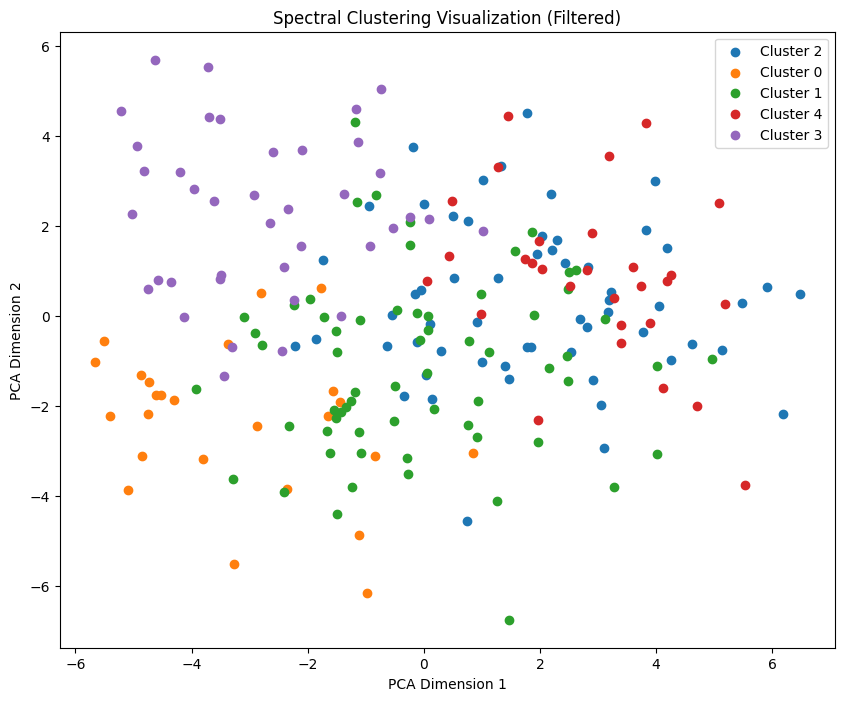

In [4]:
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.cluster import SpectralClustering
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from tqdm import tqdm

# 데이터 로드
df = pd.read_csv("Rdata.csv")

stop_words = ['너무', '좋아요', '맛있어요']

def remove_stop_words(text, stop_words):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

df['filtered_review'] = df['review'].apply(lambda x: remove_stop_words(str(x), stop_words))

model = SentenceTransformer("snunlp/KR-SBERT-V40K-klueNLI-augSTS")

texts = df['filtered_review'].astype(str).tolist()
embeddings = [model.encode(text, show_progress_bar=False) for text in tqdm(texts, desc="임베딩 생성 중", disable=True)]

df['임베딩'] = [embedding.tolist() for embedding in embeddings]

similarity_matrix = cosine_similarity(embeddings)

n_clusters = 5
spectral_clustering = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', random_state=42)
df['클러스터'] = spectral_clustering.fit_predict(similarity_matrix)

output_file = "Rdata_Spectral_filtered.csv"
df.to_csv(output_file, index=False, encoding='utf-8-sig')

print(f"Spectral Clustering 완료! 결과가 '{output_file}'에 저장되었습니다.")

# TF-IDF 벡터화
vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = vectorizer.fit_transform(df['filtered_review'])
feature_names = vectorizer.get_feature_names_out()

# 클러스터별 주요 키워드 추출
print("\n클러스터별 주요 키워드:")
for cluster in df['클러스터'].unique():
    cluster_indices = df[df['클러스터'] == cluster].index
    cluster_tfidf = tfidf_matrix[cluster_indices].mean(axis=0)
    top_indices = cluster_tfidf.A.flatten().argsort()[::-1][:10]
    top_keywords = [(feature_names[i], cluster_tfidf[0, i]) for i in top_indices]
    print(f"Cluster {cluster}: {top_keywords}")

# PCA를 사용하여 차원 축소
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

plt.figure(figsize=(10, 8))
unique_clusters = df['클러스터'].unique()
for cluster in unique_clusters:
    cluster_points = reduced_embeddings[df['클러스터'] == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster}")

plt.title("Spectral Clustering Visualization (Filtered)")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.legend()
plt.show()